In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/EU_Green/Catalonia'
os.chdir(folder_path)


Mounted at /content/drive


In [ ]:
import os
import requests
from zipfile import ZipFile
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc

In [ ]:
df = pd.read_csv('EPC_Catalonia.csv')
df.shape

(1336925, 69)

In [ ]:
eda=0

In [ ]:
df = pd.read_csv('EDA_prepaired.csv')


In [ ]:
df.head(5)

,NUM_CAS,ADREÇA,NUMERO,ESCALA,PIS,PORTA,CODI_POSTAL,POBLACIO,COMARCA,NOM_PROVINCIA,...,Energia calefacció demanda,Qualificació energia refrigeració demanda,Energia refrigeració demanda,VENTILACIO US RESIDENCIAL,LONGITUD,LATITUD,GEOREFERÈNCIA,REHABILITACIO_ENERGETICA,ACTUACIONS_REHABILITACIO,DATA_ENTRADA
0,98XVQ2GL3,Calle TOSSA,26,NaN,02,04,17130.0,Escala (L'),Alt Empordà,Girona,...,110.11,C,5.47,NaN,NaN,NaN,NaN,NO,NaN,19/02/2024
1,4BF5S9TD9,Carrer ESGLESIA,13,NaN,NaN,NaN,17474.0,Vilamacolum,Alt Empordà,Girona,...,171.67,C,7.99,NaN,NaN,NaN,NaN,NO,NaN,05/08/2020
2,JZL30CSKV,Partida LA MATA,13,NaN,NaN,NaN,43365.0,Alforja,Baix Camp,Tarragona,...,175.81,D,18.08,NaN,NaN,NaN,NaN,NO,NaN,23/05/2022
3,Q87DJVFN,Carretera D'ALFORJA,11,NaN,NaN,NaN,43350.0,Alforja,Baix Camp,Tarragona,...,32.17,D,26.50,NaN,NaN,NaN,NaN,NO,NaN,14/11/2022
4,SW5NBXJMT,Carrer Àmbit 2 del sector SUD-5,S/N,NaN,NaN,NaN,17469.0,Vilamalla,Alt Empordà,Girona,...,5.92,D,15.95,NaN,NaN,NaN,NaN,NaN,NaN,27/07/2023


In [ ]:
for col in df.columns:
  if df[col].dtype== 'object':
    print(f'{col}: {df[col].nunique()}{df[col].unique()}')

NUM_CAS: 1336900['98XVQ2GL3' '4BF5S9TD9' 'JZL30CSKV' ... 'BD1TS7S7K' '6JP3ML7RN'
 'M49S72JJ4']
ADREÇA: 208608['Calle TOSSA' 'Carrer ESGLESIA' 'Partida LA MATA' ...
 'Carrer Avel.li Artís Tisner' 'Pasaje Llobateras'
 'Carrer BOUGANVILLES LES']
NUMERO: 1837['26' '13' '11' ... '259-263' '10-12' '25003']
ESCALA: 1725[nan '0' '1' ... '3(F)' '-.-' '79']
PIS: 1577['02' nan '4' ... '3C' 'Pbj' '2R']
PORTA: 1888['04' nan '19' ... 'unc' 'NI' 'Local 1B']
POBLACIO: 1176["Escala (L')" 'Vilamacolum' 'Alforja' ... 'Sant Carles de la Rápita'
 'Nav?s' 'Ol?rdola']
COMARCA: 72['Alt Empordà' 'Baix Camp' 'Baix Llobregat' 'Baix Empordà' 'Gironès'
 'Conca de Barberà' 'Baix Penedès' 'Vallès Occidental' 'Segrià'
 'Pallars Sobirà' 'Selva' 'Tarragonès' 'Maresme' 'Garraf' 'Montsià'
 'Urgell' 'Osona' 'Solsonès' 'Vallès Oriental' 'Barcelonès' 'Segarra'
 'Noguera' 'Baix Ebre' 'Cerdanya' "Ribera d'Ebre" 'Bages' 'Alt Camp'
 "Pla de l'Estany" 'Alt Urgell' 'Ripollès' 'Garrigues' 'Garrotxa'
 'Alt Penedès' 'Anoia' 'Moianès

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336925 entries, 0 to 1336924
Data columns (total 69 columns):
 #   Column                                                  Non-Null Count    Dtype  
---  ------                                                  --------------    -----  
 0   NUM_CAS                                                 1336925 non-null  object 
 1   ADREÇA                                                  1336925 non-null  object 
 2   NUMERO                                                  1336866 non-null  object 
 3   ESCALA                                                  275216 non-null   object 
 4   PIS                                                     1002988 non-null  object 
 5   PORTA                                                   951983 non-null   object 
 6   CODI_POSTAL                                             1336922 non-null  float64
 7   POBLACIO                                                1336925 non-null  object 
 8   COMARCA     

### Missing Values

In [ ]:
missed = pd.DataFrame({
    'column_name': df.columns,
    'number_of_missing_values': df.isnull().sum(),
    'percentage_of_missing_values': (df.isnull().sum() / len(df)) * 100
})
missed

,column_name,number_of_missing_values,percentage_of_missing_values
NUM_CAS,NUM_CAS,0,0.000000
ADREÇA,ADREÇA,0,0.000000
NUMERO,NUMERO,59,0.004413
ESCALA,ESCALA,1061709,79.414253
PIS,PIS,333937,24.977991
...,...,...,...
LATITUD,LATITUD,19058,1.425510
GEOREFERÈNCIA,GEOREFERÈNCIA,19058,1.425510
REHABILITACIO_ENERGETICA,REHABILITACIO_ENERGETICA,377548,28.240028
ACTUACIONS_REHABILITACIO,ACTUACIONS_REHABILITACIO,1319813,98.720048


In [ ]:
print(f'number of fully poplulated columns: {missed[missed["number_of_missing_values"] == 0].shape[0]}')
print(f'number of columns with missing values less than 10% :  {missed[missed["percentage_of_missing_values"] <= 10].shape[0]}')
print(f'number of columns with missing values less than 20% :  {missed[missed["percentage_of_missing_values"] <= 20].shape[0]}')
print(f'number of columns with missing values less than 30% :  {missed[missed["percentage_of_missing_values"] <= 30].shape[0]}')
print(f'number of columns with missing values less than 40% :  {missed[missed["percentage_of_missing_values"] <= 40].shape[0]}')
print(f'number of columns with missing values less than 50% :  {missed[missed["percentage_of_missing_values"] <= 50].shape[0]}')
print(f'number of columns with missing values more than 50% :  {missed[missed["percentage_of_missing_values"] >= 50].shape[0]}')
print(f'number of columns with missing values more than 80% :  {missed[missed["percentage_of_missing_values"] >= 80].shape[0]}')
print(f'number of columns with missing values more than 90% :  {missed[missed["percentage_of_missing_values"] >= 90].shape[0]}')

number of fully poplulated columns: 18
number of columns with missing values less than 10% :  56
number of columns with missing values less than 20% :  56
number of columns with missing values less than 30% :  61
number of columns with missing values less than 40% :  61
number of columns with missing values less than 50% :  61
number of columns with missing values more than 50% :  8
number of columns with missing values more than 80% :  6
number of columns with missing values more than 90% :  6


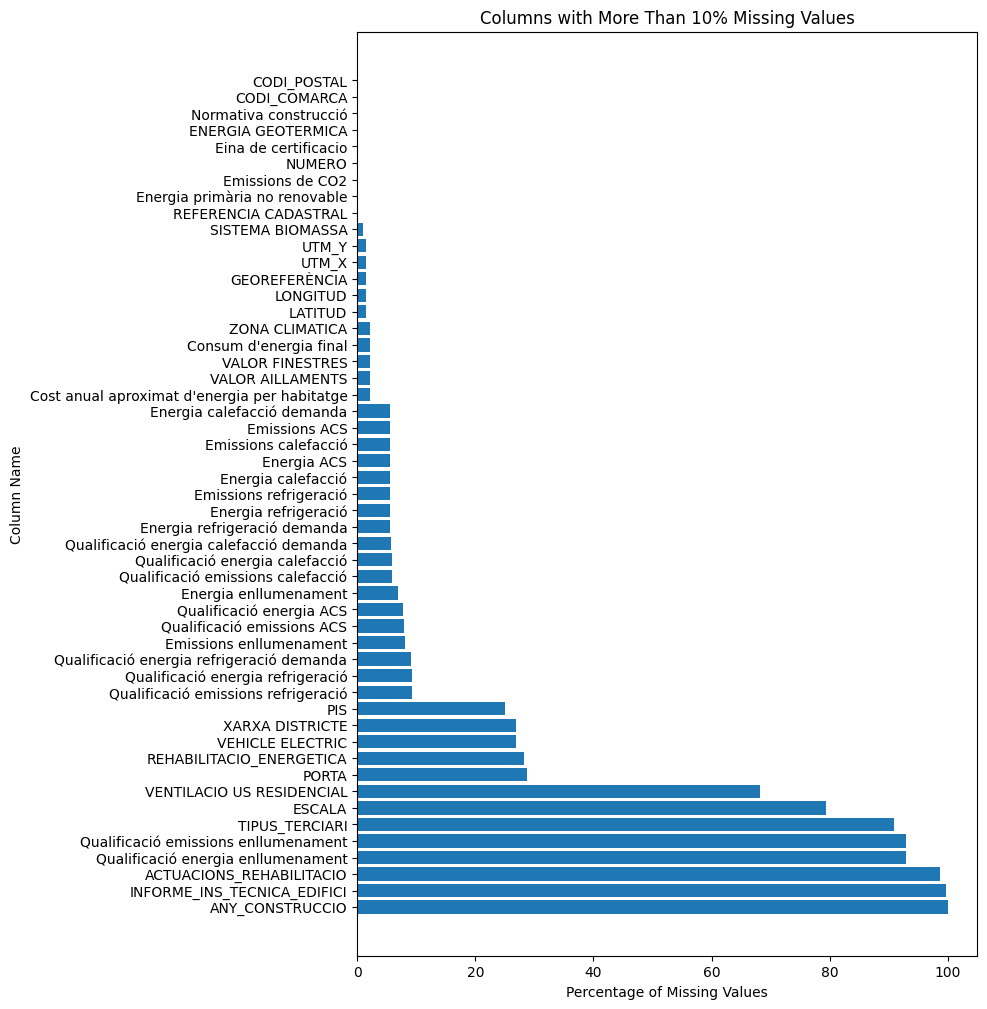

In [ ]:
filtered_df = missed[missed['percentage_of_missing_values'] > 0].sort_values(by='percentage_of_missing_values', ascending=False)

# Plot a horizontal bar chart of filtered data using percent of missing values column
plt.figure(figsize=(8,12))
plt.barh(filtered_df['column_name'], filtered_df['percentage_of_missing_values'])
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.title('Columns with Missing Values')
plt.show()


In [ ]:
missed[missed["percentage_of_missing_values"] >= 90]

,column_name,number_of_missing_values,percentage_of_missing_values
ANY_CONSTRUCCIO,ANY_CONSTRUCCIO,1336602,99.975840
INFORME_INS_TECNICA_EDIFICI,INFORME_INS_TECNICA_EDIFICI,1331865,99.621520
TIPUS_TERCIARI,TIPUS_TERCIARI,1214326,90.829777
Qualificació emissions enllumenament,Qualificació emissions enllumenament,1241627,92.871851
Qualificació energia enllumenament,Qualificació energia enllumenament,1241677,92.875591
ACTUACIONS_REHABILITACIO,ACTUACIONS_REHABILITACIO,1319813,98.720048


In [ ]:
missed[missed["percentage_of_missing_values"] >= 30]

,column_name,number_of_missing_values,percentage_of_missing_values
ESCALA,ESCALA,1061709,79.414253
ANY_CONSTRUCCIO,ANY_CONSTRUCCIO,1336602,99.975840
INFORME_INS_TECNICA_EDIFICI,INFORME_INS_TECNICA_EDIFICI,1331865,99.621520
TIPUS_TERCIARI,TIPUS_TERCIARI,1214326,90.829777
Qualificació emissions enllumenament,Qualificació emissions enllumenament,1241627,92.871851
Qualificació energia enllumenament,Qualificació energia enllumenament,1241677,92.875591
VENTILACIO US RESIDENCIAL,VENTILACIO US RESIDENCIAL,912631,68.263440
ACTUACIONS_REHABILITACIO,ACTUACIONS_REHABILITACIO,1319813,98.720048


In [ ]:
df['VENTILACIO US RESIDENCIAL'].unique()

array([  nan,  0.86,  0.63,  0.83,  0.54,  0.94,  0.65,  0.59,  0.49,
        0.8 ,  0.39,  0.92,  0.55,  0.38,  0.98,  0.88,  0.4 ,  0.57,
        0.85,  0.37,  0.82,  0.44,  0.46,  0.67,  0.66,  0.84,  0.91,
        0.64,  0.87,  0.7 ,  0.62,  0.42,  0.3 ,  0.5 ,  0.43,  1.06,
        0.79,  0.95,  0.34,  1.01,  0.47,  0.41,  0.97,  1.08,  0.56,
        0.68,  0.28,  0.15,  0.45,  1.43,  1.  ,  0.6 ,  0.89,  1.16,
        0.32,  0.96,  0.9 ,  0.29,  0.26,  0.73,  0.23,  2.7 ,  0.76,
        3.  ,  1.24,  0.22,  0.35,  0.81,  0.05,  0.2 ,  0.21,  0.72,
        0.48,  0.99,  1.3 ,  0.52,  1.14,  2.38,  0.75,  0.58,  0.18,
        0.24,  2.05,  0.36,  0.69,  0.11,  1.09,  0.33,  0.  ,  0.14,
        0.61,  0.78,  1.61,  0.53,  0.1 ,  1.07,  0.16,  1.56,  1.15,
        1.36,  0.25,  1.25,  1.5 ,  0.12,  1.02,  0.51,  1.4 ,  0.74,
        1.2 ,  0.31,  0.71,  1.6 ,  0.93,  0.77,  1.1 ,  1.05,  1.35,
        0.02,  0.27,  2.  ,  1.51,  1.52,  1.12,  1.27,  1.85,  1.26,
        1.03,  1.13,

In [ ]:
import pandas as pd

missing_values_info = []

for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        missing_count = df[col].isnull().sum()
        missing_percentage = (missing_count / len(df)) * 100
        missing_values_info.append({
            'column_name': col,
            'number_of_missing_values': missing_count,
            'percentage_of_missing_values': missing_percentage
        })

missing_values_df = pd.DataFrame(missing_values_info)
missing_values_df


,column_name,number_of_missing_values,percentage_of_missing_values
0,CODI_POSTAL,3,0.000224
1,CODI_POBLACIO,0,0.000000
2,CODI_COMARCA,17,0.001272
3,CODI_PROVINCIA,0,0.000000
4,METRES_CADASTRE,0,0.000000
5,ANY_CONSTRUCCIO,1336602,99.975840
6,Energia primària no renovable,130,0.009724
7,Emissions de CO2,125,0.009350
8,Consum d'energia final,28486,2.130710
9,Cost anual aproximat d'energia per habitatge,28486,2.130710


#### Remove Columns

In [ ]:
# Qualificació energia enllumenament
# Qualificació emissions enllumenament
# TIPUS_TERCIAR
cols = ["ACTUACIONS_REHABILITACIO" ,#alot missing value
        "SOLAR TERMICA" , # one value
        "SOLAR FOTOVOLTAICA" , # one value
        "INFORME_INS_TECNICA_EDIFICI" , #alot missing value
        "ANY_CONSTRUCCIO", #alot missing value
        "ESCALA" , #high cardinal, alot missing value
        "NUM_CAS", # id , high cardinal ,
        "VENTILACIO US RESIDENCIAL" #alot missing value
        ]
df = df.drop(columns=cols)
df.shape

(1336925, 61)

fill missing valuse of numerical columns with median

In [ ]:
columns = [
    "Cost anual aproximat d'energia per habitatge",
    "Consum d'energia final",
    "Emissions de CO2",
    "Energia primària no renovable",
    "VALOR FINESTRES",
    "VALOR AILLAMENTS",
    "Emissions calefacció",
    "Emissions refrigeració",
    "Emissions ACS",
    "Emissions enllumenament",
    "Energia calefacció",
    "Energia refrigeració",
    "Energia ACS",
    "Energia enllumenament",
    "Energia calefacció demanda",
    "Energia refrigeració demanda",
    # "VENTILACIO US RESIDENCIAL"
]
df[columns] = df[columns].fillna(df[columns].median())

In [ ]:

missing_values_info = []

for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        missing_count = df[col].isnull().sum()
        missing_percentage = (missing_count / len(df)) * 100
        missing_values_info.append({
            'column_name': col,
            'number_of_missing_values': missing_count,
            'percentage_of_missing_values': missing_percentage
        })

missing_values_df = pd.DataFrame(missing_values_info)
missing_values_df


,column_name,number_of_missing_values,percentage_of_missing_values
0,CODI_POSTAL,3,0.000224
1,CODI_POBLACIO,0,0.000000
2,CODI_COMARCA,17,0.001272
3,CODI_PROVINCIA,0,0.000000
4,METRES_CADASTRE,0,0.000000
5,Energia primària no renovable,0,0.000000
6,Emissions de CO2,0,0.000000
7,Consum d'energia final,0,0.000000
8,Cost anual aproximat d'energia per habitatge,0,0.000000
9,VALOR AILLAMENTS,0,0.000000


### Encoding

In [ ]:
for col in df.columns:
  if 'CODI' in col:
    print(f'{col}: {df[col].nunique()}')

CODI_POSTAL: 2294
CODI_POBLACIO: 948
CODI_COMARCA: 42
CODI_PROVINCIA: 4


In [ ]:
for col in df.columns:
  if df[col].dtype== 'float64':
    print(f'{col}: {df[col].nunique()}')

CODI_POSTAL: 2294
CODI_COMARCA: 42
METRES_CADASTRE: 35844
ANY_CONSTRUCCIO: 80
Energia primària no renovable: 60877
Emissions de CO2: 17910
Consum d'energia final: 47403
Cost anual aproximat d'energia per habitatge: 211107
VALOR AILLAMENTS: 520
VALOR FINESTRES: 722
VALOR AILLAMENTS CTE: 5
VALOR FINESTRES CTE: 4
UTM_X: 417473
UTM_Y: 415671
Emissions calefacció: 13605
Emissions refrigeració: 2698
Emissions ACS: 6767
Emissions enllumenament: 5716
Energia calefacció: 48148
Energia refrigeració: 9752
Energia ACS: 24607
Energia enllumenament: 16821
Energia calefacció demanda: 31346
Energia refrigeració demanda: 8766
VENTILACIO US RESIDENCIAL: 362
LONGITUD: 426554
LATITUD: 426554


In [ ]:
for col in df.columns:
  if df[col].dtype== 'object':
    print(f'{col}: {df[col].nunique()}{df[col].unique()}')

NUM_CAS: 1336900['98XVQ2GL3' '4BF5S9TD9' 'JZL30CSKV' ... 'BD1TS7S7K' '6JP3ML7RN'
 'M49S72JJ4']
ADREÇA: 208608['Calle TOSSA' 'Carrer ESGLESIA' 'Partida LA MATA' ...
 'Carrer Avel.li Artís Tisner' 'Pasaje Llobateras'
 'Carrer BOUGANVILLES LES']
NUMERO: 1837['26' '13' '11' ... '259-263' '10-12' '25003']
PIS: 1577['02' nan '4' ... '3C' 'Pbj' '2R']
PORTA: 1888['04' nan '19' ... 'unc' 'NI' 'Local 1B']
POBLACIO: 1176["Escala (L')" 'Vilamacolum' 'Alforja' ... 'Sant Carles de la Rápita'
 'Nav?s' 'Ol?rdola']
COMARCA: 72['Alt Empordà' 'Baix Camp' 'Baix Llobregat' 'Baix Empordà' 'Gironès'
 'Conca de Barberà' 'Baix Penedès' 'Vallès Occidental' 'Segrià'
 'Pallars Sobirà' 'Selva' 'Tarragonès' 'Maresme' 'Garraf' 'Montsià'
 'Urgell' 'Osona' 'Solsonès' 'Vallès Oriental' 'Barcelonès' 'Segarra'
 'Noguera' 'Baix Ebre' 'Cerdanya' "Ribera d'Ebre" 'Bages' 'Alt Camp'
 "Pla de l'Estany" 'Alt Urgell' 'Ripollès' 'Garrigues' 'Garrotxa'
 'Alt Penedès' 'Anoia' 'Moianès' 'Berguedà' 'Terra Alta' "Pla d'Urgell"
 "Val d

#### label encoding of rating columns

In [ ]:
rate_columns =[ "Qualificació de consum d'energia primaria no renovable",
               "Qualificacio d'emissions de CO2",
                "Qualificació emissions calefacció",
               "Qualificació emissions refrigeració",
                "Qualificació emissions ACS",
                "Qualificació energia calefacció" ,
                "Qualificació energia enllumenament" ,
                "Qualificació emissions enllumenament",
               "Qualificació energia refrigeració" ,
                "Qualificació energia ACS" ,
                "Qualificació energia calefacció demanda",
               "Qualificació energia refrigeració demanda",
                "ZONA CLIMATICA"]


climate_zone= "ZONA CLIMATICA" #['C2' 'C3' 'D2' 'D3' 'E1' 'D1' 'B3' nan]
df[rate_columns] = df[rate_columns].fillna('other')
df[climate_zone] = df[climate_zone].fillna('other')
label_mapping = {'A': 0, 'B': 1, 'C': 2 , 'D': 3, 'E':4, 'F':5, 'G':6, '-':99999, 'other':99999}
climate_zone_mapping = {'B3': 0, 'C2': 1 , 'C3': 3, 'D1':4, 'D2':5, 'D3':6,'E1':6, 'other':99999}
for col in rate_columns :
  name = 'ENCODED '+col
  df[name] = df[col].map(label_mapping)
df['ENCODED '+climate_zone] = df[climate_zone].map(climate_zone_mapping)
df= df.drop(columns=rate_columns)
df= df.drop(columns=["ZONA CLIMATICA"])

#### OneHot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cols = [
    "NOM_PROVINCIA", # it has its code , but onehot should be appplied since it is not ordinal
      "VEHICLE ELECTRIC", #boolean
      "SISTEMA BIOMASSA", #boolean
      "XARXA DISTRICTE", #boolean
      "ENERGIA GEOTERMICA", #boolean
      "REHABILITACIO_ENERGETICA", #boolean
      "Tipus Tramit", #3 unique
      "TIPUS_TERCIARI",  #miss 90%
      "US_EDIFICI" #11 unique
      ]
df[cols] = df[cols].fillna('other')
df = pd.get_dummies(df, columns=cols ,dtype=int)
df.shape

(1336925, 152)

#### Frequency Encoding

In [ ]:
"COMARCA" : 72 #Counties
"Normativa construcció" : 10 # Construction regulations (CTE)
"Motiu de la certificacio" : 36 # Reason for certification (new construction, rental, sale,)
"Eina de certificacio": 16 # Tool used to perform the certificate
"VALOR AILLAMENTS CTE": 5 # int64
"VALOR FINESTRES CTE": 4 # int64

In [ ]:
df['FR_Encoded_COMARCA'] = df['COMARCA'].map(df['COMARCA'].value_counts())
df['FR_Encoded_Normativa construcció'] = df["Normativa construcció"].map(df["Normativa construcció"].value_counts())
df['FR_Encoded_Motiu de la certificacio'] = df["Motiu de la certificacio"].map(df["Motiu de la certificacio"].value_counts())
df['FR_Encoded_Eina de certificacio'] = df["Eina de certificacio"].map(df["Eina de certificacio"].value_counts())
df['FR_Encoded_VALOR AILLAMENTS CTE'] = df["VALOR AILLAMENTS CTE"].map(df["VALOR AILLAMENTS CTE"].value_counts())
df['FR_Encoded_VALOR FINESTRES CTE'] = df["VALOR FINESTRES CTE"].map(df["VALOR FINESTRES CTE"].value_counts())
cols_to_drop=['COMARCA',"Normativa construcció", "Motiu de la certificacio", "Eina de certificacio", "VALOR AILLAMENTS CTE", "VALOR FINESTRES CTE"]
# df = df.drop(columns=cols_to_drop,)
df.shape

(1336925, 158)

In [ ]:
df.columns.tolist()

['ADREÇA',
 'NUMERO',
 'PIS',
 'PORTA',
 'CODI_POSTAL',
 'POBLACIO',
 'CODI_POBLACIO',
 'CODI_COMARCA',
 'CODI_PROVINCIA',
 'REFERENCIA CADASTRAL',
 'METRES_CADASTRE',
 'Energia primària no renovable',
 'Emissions de CO2',
 "Consum d'energia final",
 "Cost anual aproximat d'energia per habitatge",
 'VALOR AILLAMENTS',
 'VALOR FINESTRES',
 'UTM_X',
 'UTM_Y',
 'Emissions calefacció',
 'Emissions refrigeració',
 'Emissions ACS',
 'Emissions enllumenament',
 'Energia calefacció',
 'Energia refrigeració',
 'Energia ACS',
 'Energia enllumenament',
 'Energia calefacció demanda',
 'Energia refrigeració demanda',
 'VENTILACIO US RESIDENCIAL',
 'LONGITUD',
 'LATITUD',
 'GEOREFERÈNCIA',
 'DATA_ENTRADA',
 "ENCODED Qualificació de consum d'energia primaria no renovable",
 "ENCODED Qualificacio d'emissions de CO2",
 'ENCODED Qualificació emissions calefacció',
 'ENCODED Qualificació emissions refrigeració',
 'ENCODED Qualificació emissions ACS',
 'ENCODED Qualificació energia calefacció',
 'ENCODED 

### Numerical Continuos Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import mstats
from scipy import stats
from sklearn.preprocessing import RobustScaler
def shift_values_to_pos_range(feature):
  """
  subtracts all values from the minimum value , if there exist negetive values in the data
  """
  # print(feature.dtype)
  min_val = feature.min()
  if min_val <0:
    shifted_feature = feature- min_val
    return shifted_feature
  else:
    return feature

def preprocessing_numerical_continuous_feature(df, feature, ax=None):

  name= 'preprocessed_' +feature
  # 1- replacing all negative values with zero
  df[name] = df[feature].apply(lambda x: x if x >= 0 else 0)
  # 2- boxcox transformation to unifor the data
  df[name], _ = stats.boxcox(df[name] + 1)
  # 3- removing outliers of begger and smaller 99 and 1 percentile
  lower_percentile = np.percentile(df[name], 1)
  upper_percentile = np.percentile(df[name], 99)
  df[name] = np.clip(df[name], lower_percentile, upper_percentile)
  # 4- standardize the scale
  scaler = StandardScaler()
  df[name] = scaler.fit_transform(df[[name]])

  if ax:
    ax.hist(df[name], bins=10, rwidth=0.8, color='skyblue')
    ax.set_title(name)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
  else:
    plt.figure(figsize=(8,6))
    plt.hist(df[name], bins=10,rwidth=0.8, color='skyblue', )
    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    df[name].describe()



-48.21 96535.08


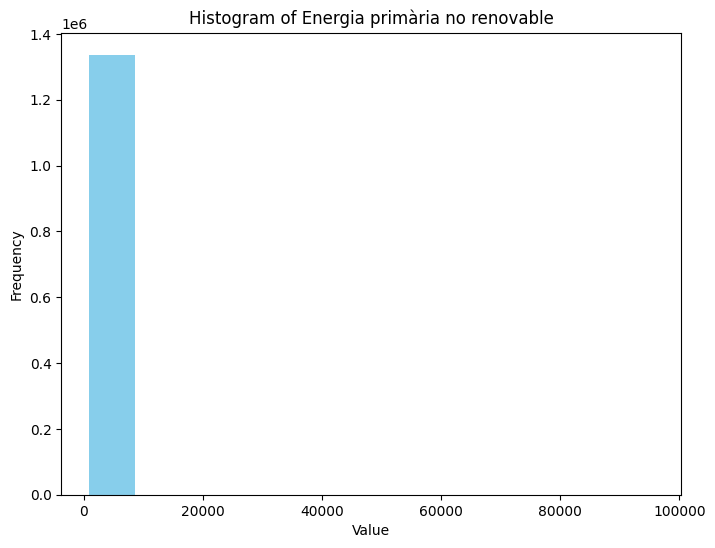

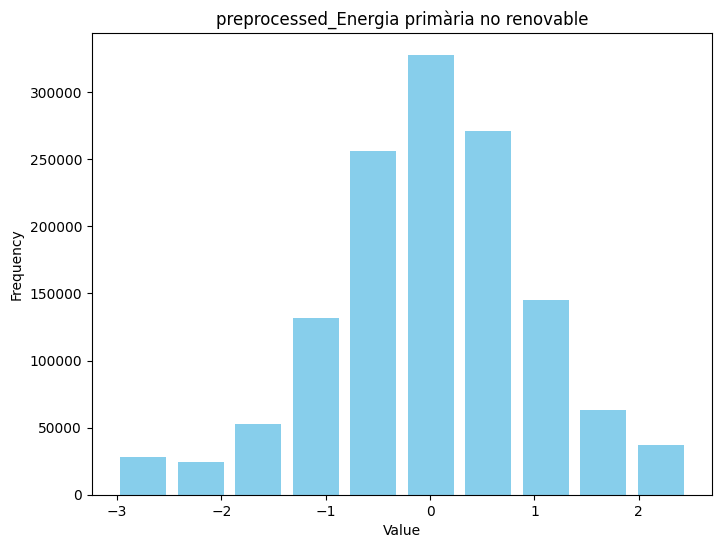

In [ ]:
print(df['Energia primària no renovable'].min(), df['Energia primària no renovable'].max())
plt.figure(figsize=(8,6))
plt.hist(df['Energia primària no renovable'], bins=10,rwidth=0.8, color='skyblue', )
plt.title('Histogram of Energia primària no renovable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
df['Energia primària no renovable'].describe()
preprocessing_numerical_continuous_feature(df, 'Energia primària no renovable')


-8.17 60393.0


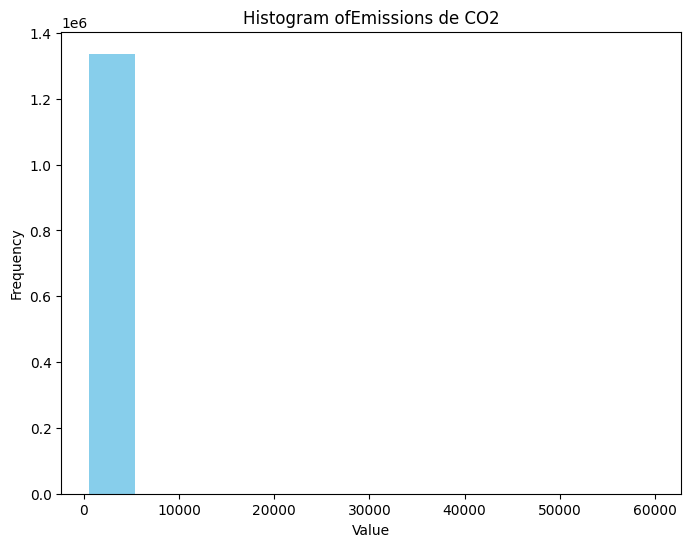

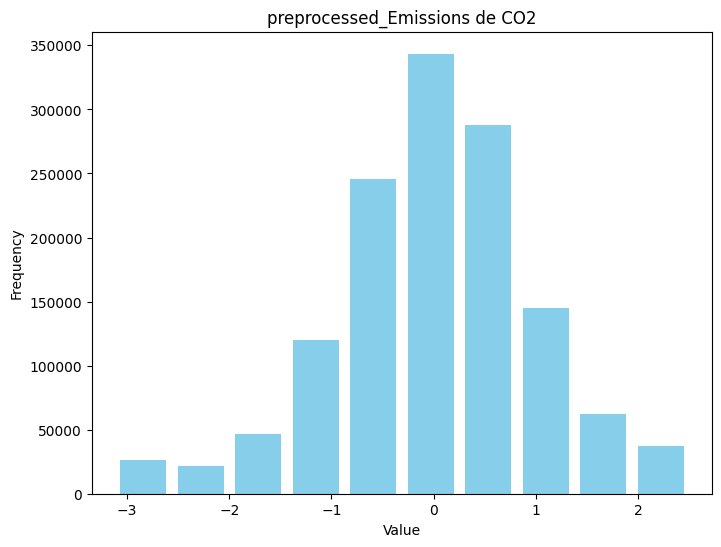

In [ ]:
print(df['Emissions de CO2'].min(), df['Emissions de CO2'].max())
plt.figure(figsize=(8,6))
plt.hist(df['Emissions de CO2'], bins=10,rwidth=0.8, color='skyblue', )
plt.title('Histogram ofEmissions de CO2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
df['Emissions de CO2'].describe()
preprocessing_numerical_continuous_feature(df, 'Emissions de CO2')


-123.75 60589.2


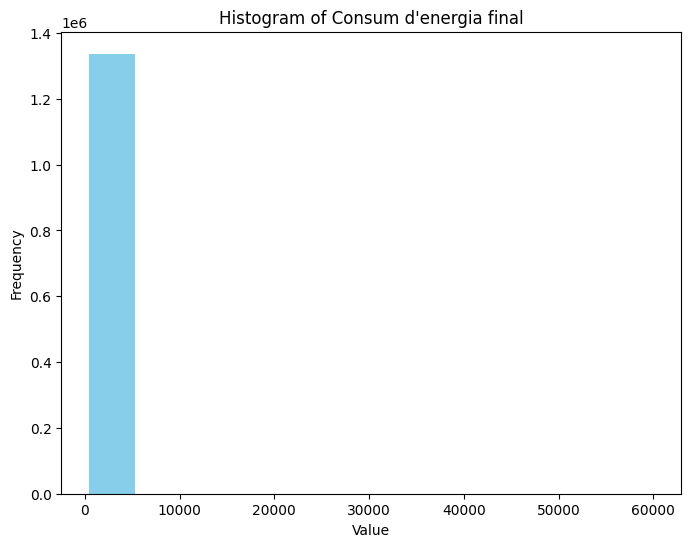

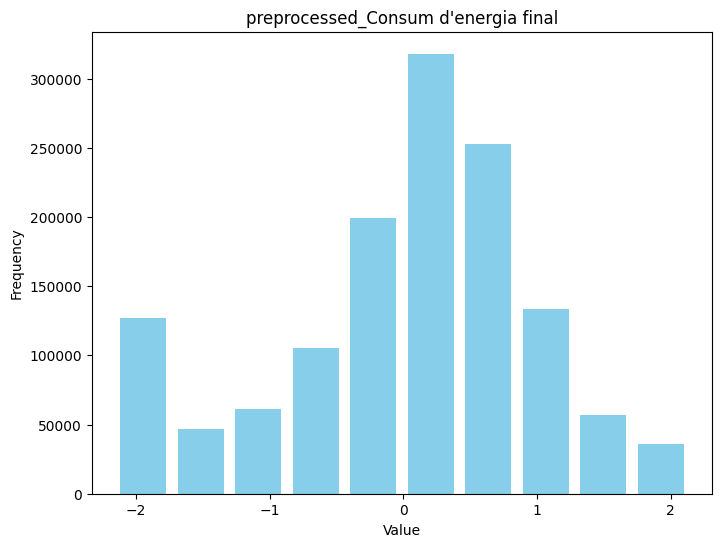

In [ ]:
print(df["Consum d'energia final"].min(), df["Consum d'energia final"].max())
plt.figure(figsize=(8,6))
plt.hist(df["Consum d'energia final"], bins=10,rwidth=0.8, color='skyblue', )
plt.title("Histogram of Consum d'energia final")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
df["Consum d'energia final"].describe()
preprocessing_numerical_continuous_feature(df, "Consum d'energia final")


-2441.69 5300218.69


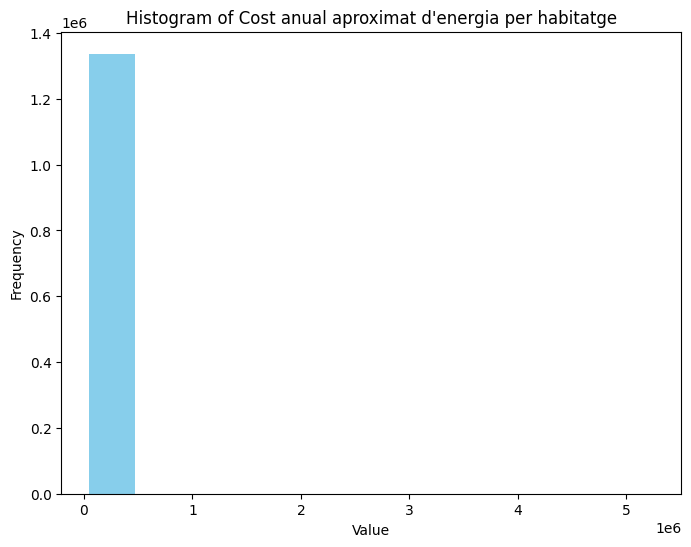

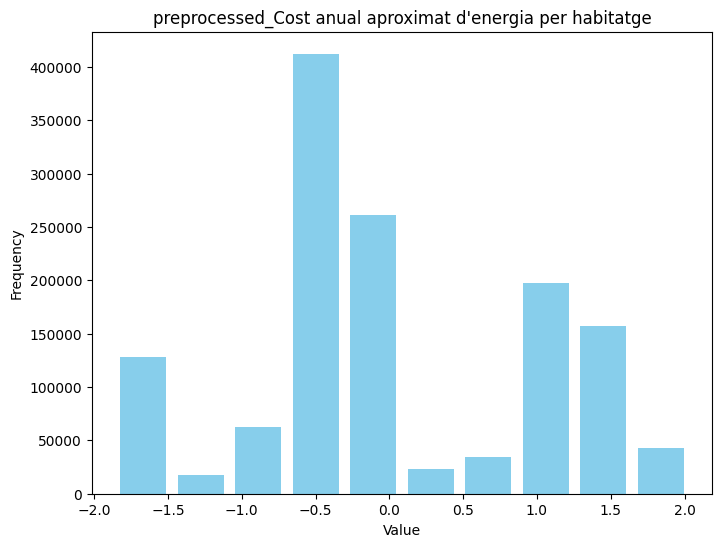

In [ ]:

print(df["Cost anual aproximat d'energia per habitatge"].min(), df["Cost anual aproximat d'energia per habitatge"].max())
plt.figure(figsize=(8,6))
plt.hist(df["Cost anual aproximat d'energia per habitatge"], bins=10,rwidth=0.8, color='skyblue', )
plt.title("Histogram of Cost anual aproximat d'energia per habitatge")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
df["Cost anual aproximat d'energia per habitatge"].describe()
preprocessing_numerical_continuous_feature(df, "Cost anual aproximat d'energia per habitatge")
# from sklearn.preprocessing import PowerTransformer
# name= "preprocessed_Cost anual aproximat d'energia per habitatge"

# pt = PowerTransformer(method='yeo-johnson')
# df[name] = pt.fit_transform(df[[name]])
# # Plot the new distribution
# import matplotlib.pyplot as plt
# plt.hist(df[name], bins=30, color='lightblue', edgecolor='black')
# plt.title(f'{name} Distribution after Yeo-Johnson Transformation')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

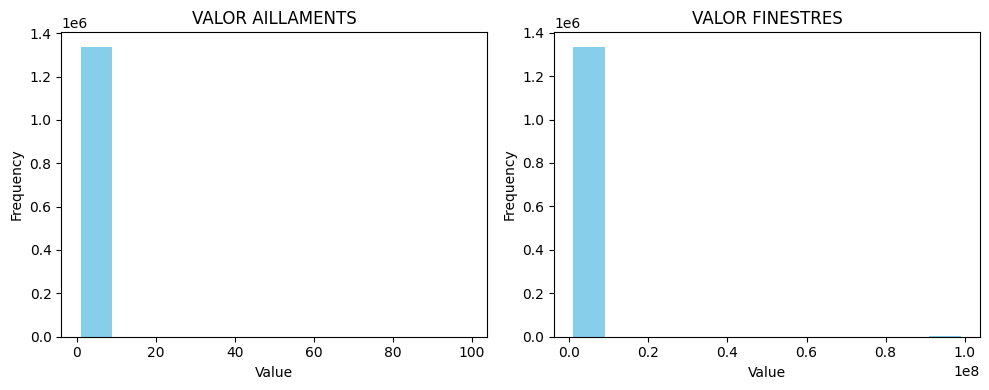

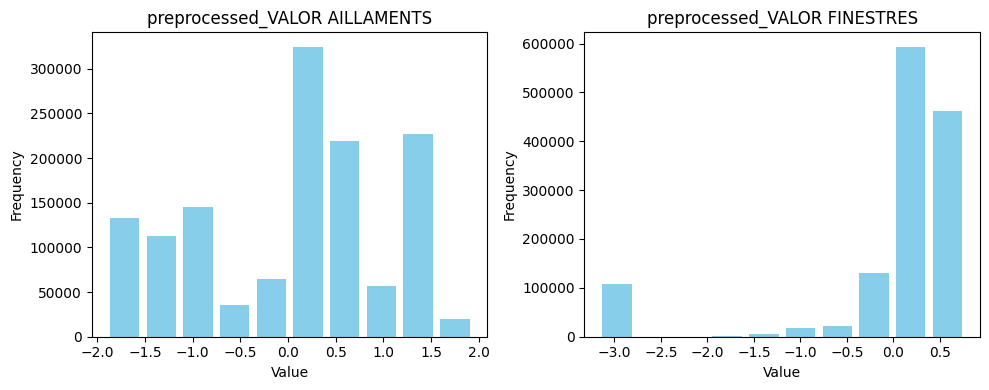

In [ ]:
categories = ['VALOR AILLAMENTS', 'VALOR FINESTRES', ]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for i, category in enumerate(categories):
    ax = axs[i]

    # print(df["Cost anual aproximat d'energia per habitatge"].min(), df["Cost anual aproximat d'energia per habitatge"].max())
    ax.hist(df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)  # Corrected here
    ax.set_xlabel('Value')   # Corrected here
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for i, category in enumerate(categories):
    ax = axs[i]
    preprocessing_numerical_continuous_feature( df, category, ax)

plt.tight_layout()
plt.show()

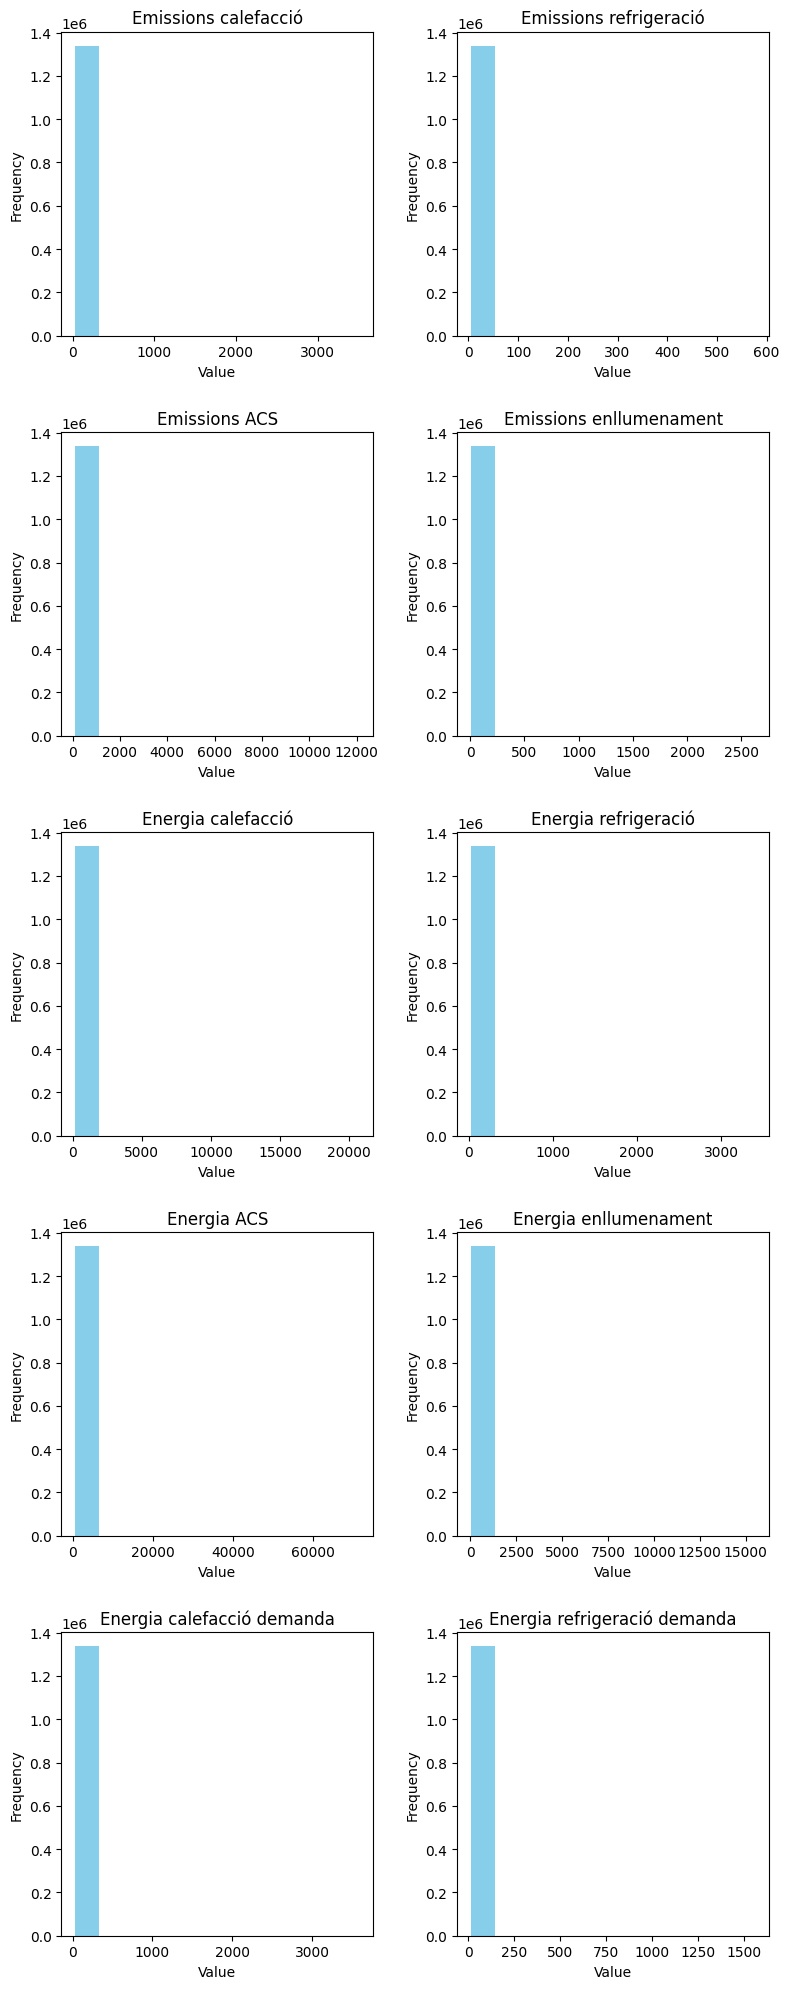

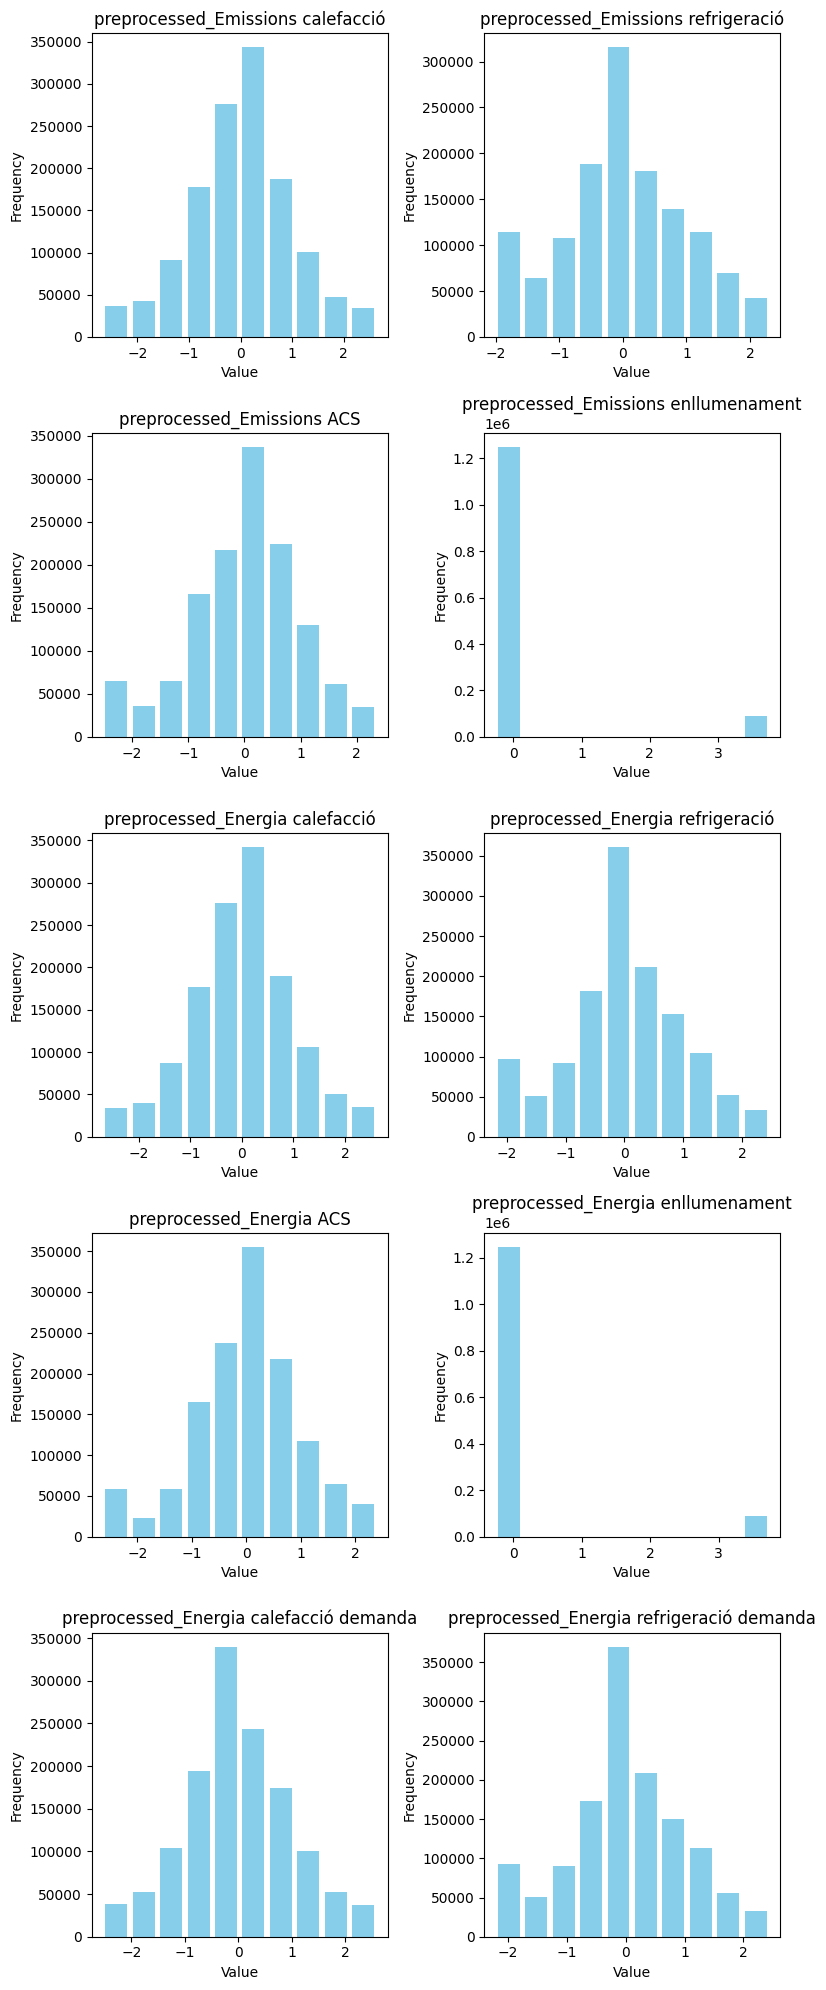

In [ ]:
columns = [
    "Emissions calefacció",
    "Emissions refrigeració",
    "Emissions ACS",
    "Emissions enllumenament",
    "Energia calefacció",
    "Energia refrigeració",
    "Energia ACS",
    "Energia enllumenament",
    "Energia calefacció demanda",
    "Energia refrigeració demanda"
]

fig, axs = plt.subplots(5, 2, figsize=(8, 20))

for i, category in enumerate(columns):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    ax = axs[row][col]
    ax.hist(df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(5, 2, figsize=(8, 20))

for i, category in enumerate(columns):
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    ax = axs[row][col]
    preprocessing_numerical_continuous_feature( df, category, ax)

plt.tight_layout()
plt.show()
  # preprocessing_numerical_continuous_feature(df, col)

### Heatmap Plots

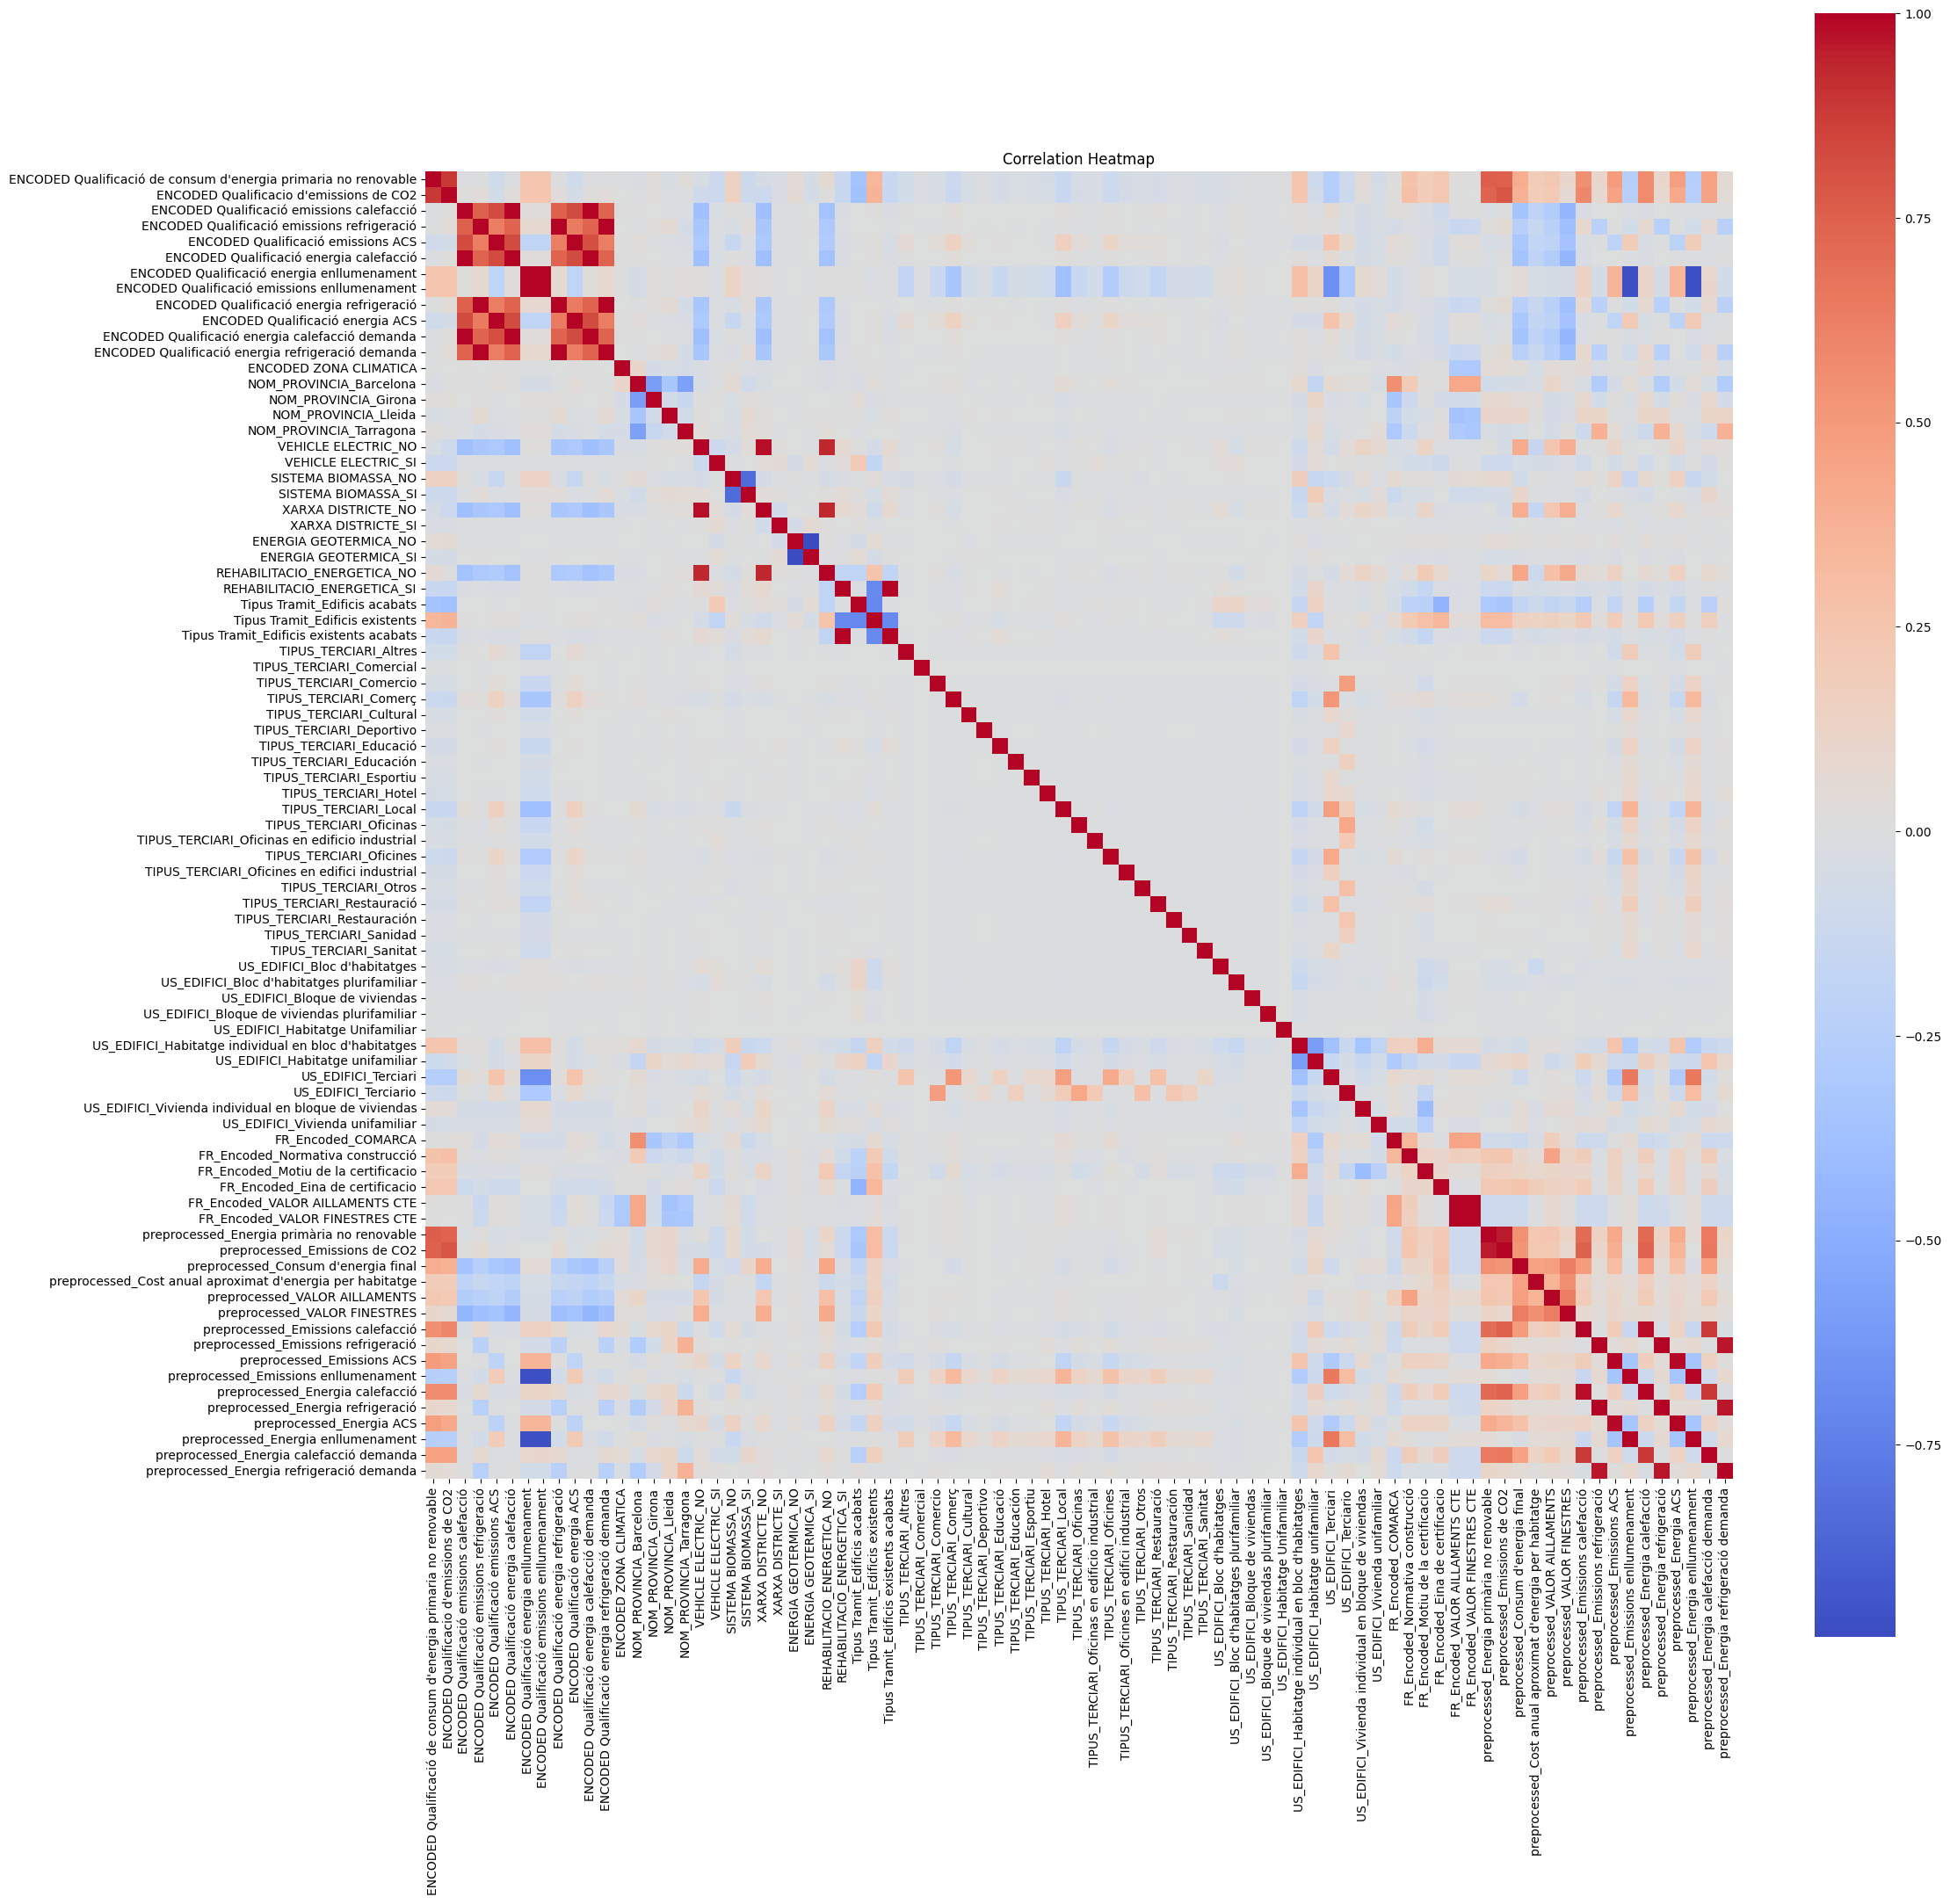

In [ ]:
columns = [
 "ENCODED Qualificació de consum d'energia primaria no renovable",
 "ENCODED Qualificacio d'emissions de CO2",
 'ENCODED Qualificació emissions calefacció',
 'ENCODED Qualificació emissions refrigeració',
 'ENCODED Qualificació emissions ACS',
 'ENCODED Qualificació energia calefacció',
 'ENCODED Qualificació energia enllumenament',
 'ENCODED Qualificació emissions enllumenament',
 'ENCODED Qualificació energia refrigeració',
 'ENCODED Qualificació energia ACS',
 'ENCODED Qualificació energia calefacció demanda',
 'ENCODED Qualificació energia refrigeració demanda',
 'ENCODED ZONA CLIMATICA',
 'NOM_PROVINCIA_Barcelona',
 'NOM_PROVINCIA_Girona',
 'NOM_PROVINCIA_Lleida',
 'NOM_PROVINCIA_Tarragona',
 'VEHICLE ELECTRIC_NO',
 'VEHICLE ELECTRIC_SI',
 'SISTEMA BIOMASSA_NO',
 'SISTEMA BIOMASSA_SI',
 'XARXA DISTRICTE_NO',
 'XARXA DISTRICTE_SI',
 'ENERGIA GEOTERMICA_NO',
 'ENERGIA GEOTERMICA_SI',
 'REHABILITACIO_ENERGETICA_NO',
 'REHABILITACIO_ENERGETICA_SI',
 'Tipus Tramit_Edificis acabats',
 'Tipus Tramit_Edificis existents',
 'Tipus Tramit_Edificis existents acabats',
 'TIPUS_TERCIARI_Altres',
 'TIPUS_TERCIARI_Comercial',
 'TIPUS_TERCIARI_Comercio',
 'TIPUS_TERCIARI_Comerç',
 'TIPUS_TERCIARI_Cultural',
 'TIPUS_TERCIARI_Deportivo',
 'TIPUS_TERCIARI_Educació',
 'TIPUS_TERCIARI_Educación',
 'TIPUS_TERCIARI_Esportiu',
 'TIPUS_TERCIARI_Hotel',
 'TIPUS_TERCIARI_Local',
 'TIPUS_TERCIARI_Oficinas',
 'TIPUS_TERCIARI_Oficinas en edificio industrial',
 'TIPUS_TERCIARI_Oficines',
 'TIPUS_TERCIARI_Oficines en edifici industrial',
 'TIPUS_TERCIARI_Otros',
 'TIPUS_TERCIARI_Restauració',
 'TIPUS_TERCIARI_Restauración',
 'TIPUS_TERCIARI_Sanidad',
 'TIPUS_TERCIARI_Sanitat',
 "US_EDIFICI_Bloc d'habitatges",
 "US_EDIFICI_Bloc d'habitatges plurifamiliar",
 'US_EDIFICI_Bloque de viviendas',
 'US_EDIFICI_Bloque de viviendas plurifamiliar',
 'US_EDIFICI_Habitatge Unifamiliar',
 "US_EDIFICI_Habitatge individual en bloc d'habitatges",
 'US_EDIFICI_Habitatge unifamiliar',
 'US_EDIFICI_Terciari',
 'US_EDIFICI_Terciario',
 'US_EDIFICI_Vivienda individual en bloque de viviendas',
 'US_EDIFICI_Vivienda unifamiliar',
 'FR_Encoded_COMARCA',
 'FR_Encoded_Normativa construcció',
 'FR_Encoded_Motiu de la certificacio',
 'FR_Encoded_Eina de certificacio',
 'FR_Encoded_VALOR AILLAMENTS CTE',
 'FR_Encoded_VALOR FINESTRES CTE',
 'preprocessed_Energia primària no renovable',
 'preprocessed_Emissions de CO2',
 "preprocessed_Consum d'energia final",
 "preprocessed_Cost anual aproximat d'energia per habitatge",
 'preprocessed_VALOR AILLAMENTS',
 'preprocessed_VALOR FINESTRES',
 'preprocessed_Emissions calefacció',
 'preprocessed_Emissions refrigeració',
 'preprocessed_Emissions ACS',
 'preprocessed_Emissions enllumenament',
 'preprocessed_Energia calefacció',
 'preprocessed_Energia refrigeració',
 'preprocessed_Energia ACS',
 'preprocessed_Energia enllumenament',
 'preprocessed_Energia calefacció demanda',
 'preprocessed_Energia refrigeració demanda']

corr_matrix = df[columns].corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr_matrix,  cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.to_csv('preprocessed_df_1.csv', index=False)

In [ ]:
!ls

 Catalonia_data.ipynb  'EPC Catalonia Data Dictionary.gsheet'
 EPC_Catalonia.csv      preprocessed_df_1.csv


### Stats

In [ ]:
df['Emissions enllumenament'].describe()

,Emissions enllumenament
count,1.336925e+06
mean,8.968741e-01
std,8.492124e+00
min,-1.689000e+01
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.652240e+03


In [ ]:
df['preprocessed_Emissions enllumenament'].describe()


,preprocessed_Emissions enllumenament
count,1.336925e+06
mean,3.067410e-17
std,1.000000e+00
min,-2.674817e-01
25%,-2.674817e-01
50%,-2.674817e-01
75%,-2.674817e-01
max,3.754333e+00


In [ ]:
df['Energia enllumenament'].describe()

,Energia enllumenament
count,1.244495e+06
mean,5.701210e+00
std,5.275293e+01
min,-9.971000e+01
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.565701e+04


In [ ]:
df['preprocessed_Energia enllumenament'].describe()


,preprocessed_Energia enllumenament
count,1.336925e+06
mean,2.230044e-16
std,1.000000e+00
min,-2.682959e-01
25%,-2.682959e-01
50%,-2.682959e-01
75%,-2.682959e-01
max,3.740225e+00


In [ ]:
columns = [
    "Cost anual aproximat d'energia per habitatge",
    "Consum d'energia final",
    "Emissions de CO2",
    "Energia primària no renovable",
    "VALOR FINESTRES",
    "VALOR AILLAMENTS",
    "Emissions calefacció",
    "Emissions refrigeració",
    "Emissions ACS",
    "Emissions enllumenament",
    "Energia calefacció",
    "Energia refrigeració",
    "Energia ACS",
    "Energia enllumenament",
    "Energia calefacció demanda",
    "Energia refrigeració demanda",]
for col in columns :
  print(f'{col}: negative_vals: {len(df[df[col]<0])} , zero_vals:{len(df[df[col]==0])}')
  df[df[col]<0] = 0.0001
  df[df[col]==0] = 0.0001

Cost anual aproximat d'energia per habitatge: negative_vals: 1060 , zero_vals:108857
Consum d'energia final: negative_vals: 76 , zero_vals:108622
Emissions de CO2: negative_vals: 1 , zero_vals:456
Energia primària no renovable: negative_vals: 1 , zero_vals:377
VALOR FINESTRES: negative_vals: 0 , zero_vals:107295
VALOR AILLAMENTS: negative_vals: 0 , zero_vals:107543
Emissions calefacció: negative_vals: 0 , zero_vals:2660
Emissions refrigeració: negative_vals: 0 , zero_vals:53802
Emissions ACS: negative_vals: 1 , zero_vals:46994
Emissions enllumenament: negative_vals: 1 , zero_vals:1246851
Energia calefacció: negative_vals: 0 , zero_vals:2634
Energia refrigeració: negative_vals: 1 , zero_vals:45382
Energia ACS: negative_vals: 1 , zero_vals:46933
Energia enllumenament: negative_vals: 1 , zero_vals:1246754
Energia calefacció demanda: negative_vals: 0 , zero_vals:1260
Energia refrigeració demanda: negative_vals: 0 , zero_vals:41294


### New Features

Original features

In [ ]:
cols = [
    'Energia calefacció',
    'Energia refrigeració',
    'Energia ACS',
    'Energia enllumenament'
]
df['total_energy']= df[cols].sum(axis=1)
cols = [
    'Emissions calefacció',
    'Emissions refrigeració',
    'Emissions ACS',
    'Emissions enllumenament'
]
df['total_Emissions']= df[cols].sum(axis=1)



In [ ]:
df['DATA_ENTRADA'] = pd.to_datetime(df['DATA_ENTRADA'])
df['DATA_ENTRADA_year'] = df['DATA_ENTRADA'].dt.year
df['DATA_ENTRADA_month'] = df['DATA_ENTRADA'].dt.month
df['age'] = 2025 - df['DATA_ENTRADA_year']

In [ ]:
Emissions_calefacció = df['Emissions calefacció']
Emissions_refrigeració =df['Emissions refrigeració']
Emissions_ACS = df['Emissions ACS']
Emissions_ACS = Emissions_ACS.apply(lambda x: 1 if x <= 0 else x)
Emissions_refrigeració = Emissions_refrigeració.apply(lambda x: 1 if x <= 0 else x)
Emissions_calefacció = Emissions_calefacció.apply(lambda x: 1 if x <= 0 else x)
df['heating_efficiency'] = df['Energia calefacció']/df['Emissions calefacció']
df['cooling_efficiency'] = df['Energia refrigeració']/Emissions_refrigeració
df['ac_efficiency'] = df['Energia ACS']/Emissions_ACS
# df['lighting_efficiency'] = df['Energia enllumenament']/df['Emissions enllumenament']

In [ ]:
final_energy = df["Consum d\'energia final"]
final_energy = final_energy.apply(lambda x: 1 if x <= 0 else x)
df['Insulation Performance Index']=df['VALOR AILLAMENTS'] + df['VALOR FINESTRES CTE']/final_energy

In [ ]:
renewable_columns = ['SISTEMA BIOMASSA', 'ENERGIA GEOTERMICA']

# Create a mapping for Yes/No responses to binary values.
# You can extend the mapping if the Yes responses are in another language (e.g., "Sí")
response_mapping = {
    "SI": 1,
    "NO": 0,
}

# Convert the renewable columns into binary (1 for Yes and 0 for No)
for col in renewable_columns:
    # Using map to replace the values; any non-mapped value will be NaN
    df[col] = df[col].map(response_mapping)

# Create the Renewable Energy Score by summing the binary values row-wise
df["Renewable_Energy_Score"] = df[renewable_columns].sum(axis=1)

# Display the first few rows to check the new feature


histogram

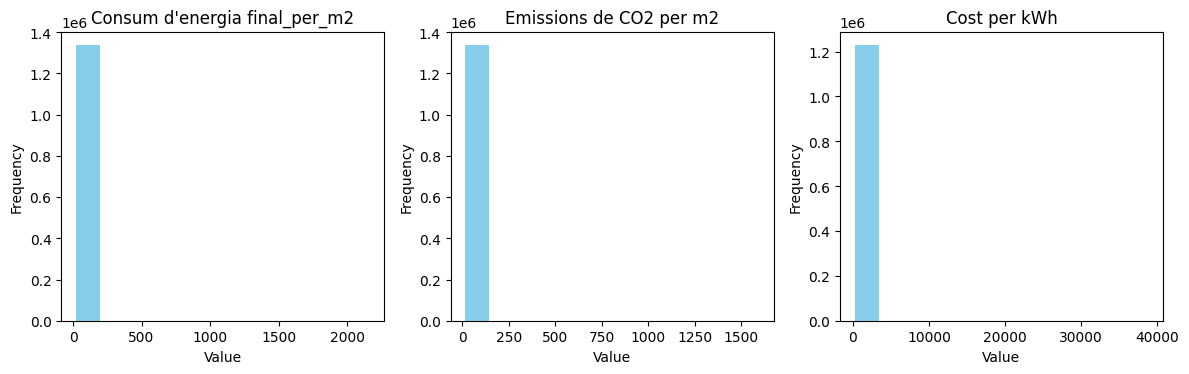

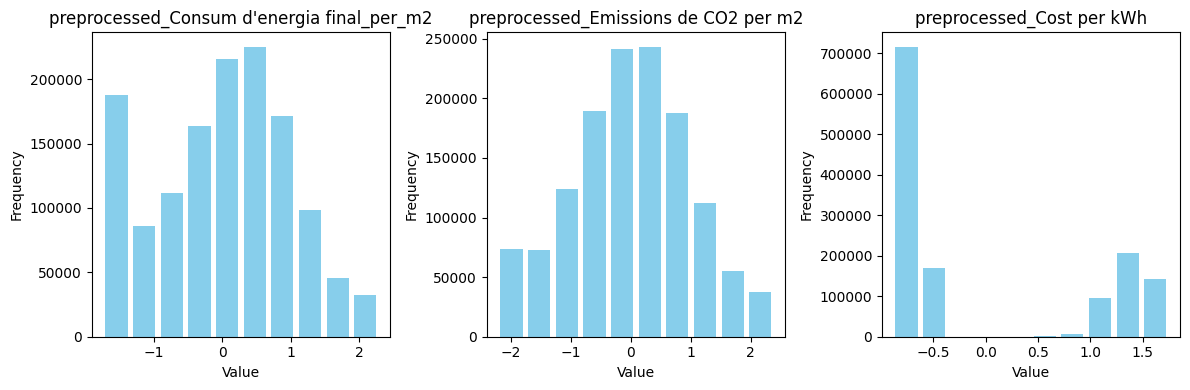

In [ ]:
columns = [
    "Consum d'energia final_per_m2",
    "Emissions de CO2 per m2",
    'Cost per kWh',
    ]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, category in enumerate(columns):
    col = i % 3
    ax = axs[col]
    ax.hist(df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, category in enumerate(columns):
    col = i % 3
    ax = axs[col]
    preprocessing_numerical_continuous_feature( df, category, ax)

plt.tight_layout()
plt.show()


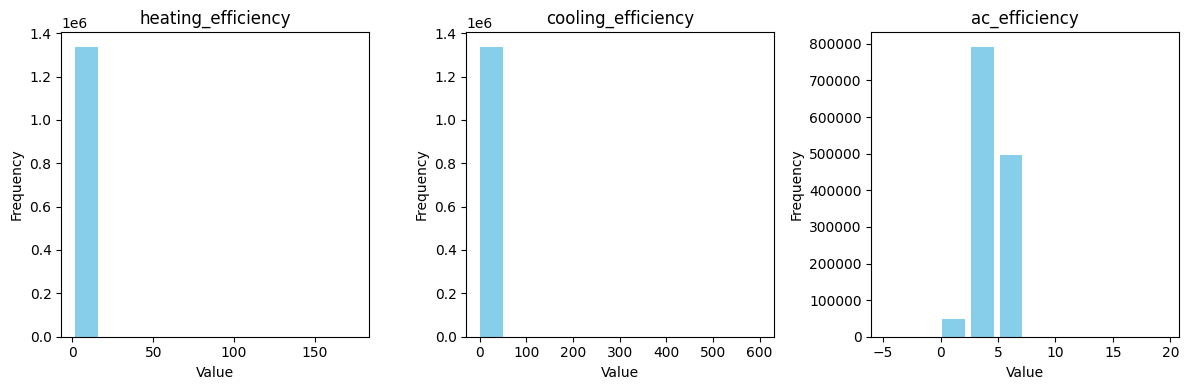

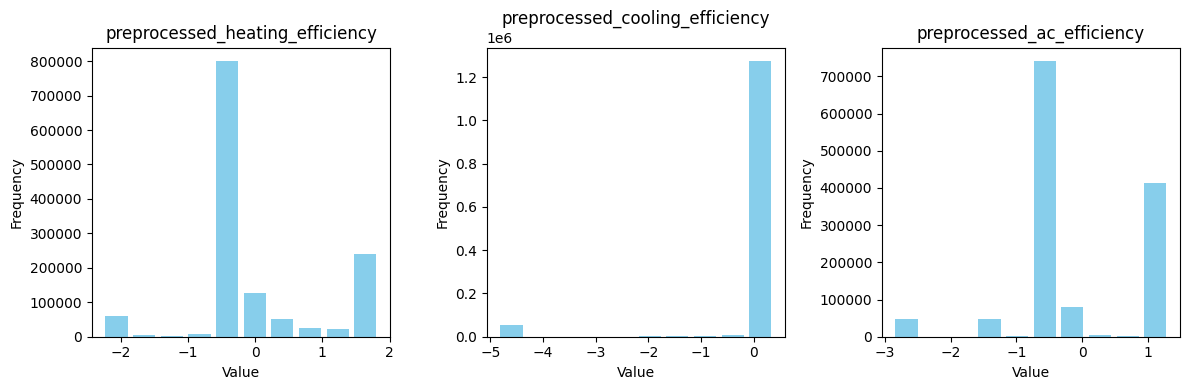

In [ ]:
columns = [

    'heating_efficiency',
    'cooling_efficiency',
    'ac_efficiency',
    ]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, category in enumerate(columns):
    col = i % 3
    ax = axs[col]
    ax.hist(df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, category in enumerate(columns):
    col = i % 3
    ax = axs[col]
    preprocessing_numerical_continuous_feature( df, category, ax)

plt.tight_layout()
plt.show()


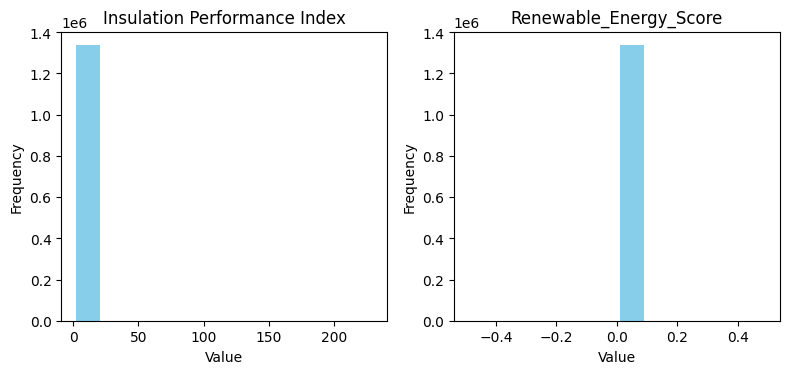

ValueError: Data must not be constant.

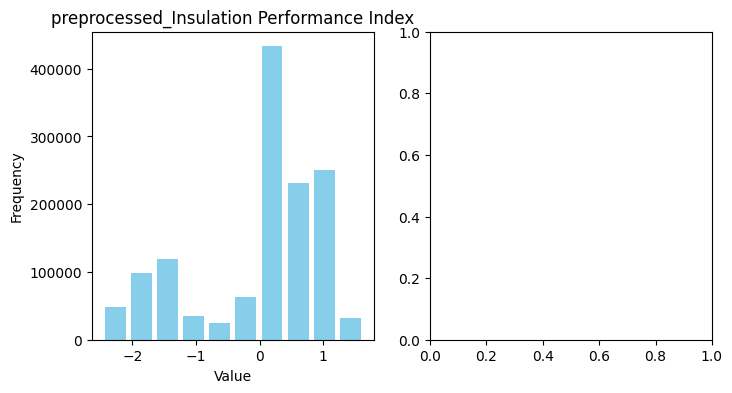

In [ ]:
columns = [
    'Insulation Performance Index',
    "Renewable_Energy_Score"
    ]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, category in enumerate(columns):
    col = i % 2
    ax = axs[col]
    ax.hist(df[category], bins=10,rwidth=0.8, color='skyblue', )
    ax.set_title(category)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, category in enumerate(columns):
    col = i % 2
    ax = axs[col]
    preprocessing_numerical_continuous_feature( df, category, ax)

plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('EDA_prepaired.csv', index=False)

In [ ]:
df.columns.tolist()

['NUM_CAS',
 'ADREÇA',
 'NUMERO',
 'ESCALA',
 'PIS',
 'PORTA',
 'CODI_POSTAL',
 'POBLACIO',
 'COMARCA',
 'CODI_POBLACIO',
 'CODI_COMARCA',
 'CODI_PROVINCIA',
 'REFERENCIA CADASTRAL',
 'METRES_CADASTRE',
 'ANY_CONSTRUCCIO',
 'Energia primària no renovable',
 'Emissions de CO2',
 "Consum d'energia final",
 "Cost anual aproximat d'energia per habitatge",
 'SOLAR TERMICA',
 'SOLAR FOTOVOLTAICA',
 'INFORME_INS_TECNICA_EDIFICI',
 'Eina de certificacio',
 'VALOR AILLAMENTS',
 'VALOR FINESTRES',
 'Motiu de la certificacio',
 'VALOR AILLAMENTS CTE',
 'VALOR FINESTRES CTE',
 'UTM_X',
 'UTM_Y',
 'Normativa construcció',
 'Emissions calefacció',
 'Emissions refrigeració',
 'Emissions ACS',
 'Emissions enllumenament',
 'Energia calefacció',
 'Energia refrigeració',
 'Energia ACS',
 'Energia enllumenament',
 'Energia calefacció demanda',
 'Energia refrigeració demanda',
 'VENTILACIO US RESIDENCIAL',
 'LONGITUD',
 'LATITUD',
 'GEOREFERÈNCIA',
 'ACTUACIONS_REHABILITACIO',
 'DATA_ENTRADA',
 "Consum d'e

In [ ]:
df.to_csv('model_prepared.csv', index=False)
